<a href="https://colab.research.google.com/github/lucky7171/data-Science-projects/blob/starlet/annotation_ml_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Machine Learning and Computer Vision for Tree Species Classification

## What is Machine Learning?

Machine Learning (ML) is a subset of artificial intelligence that enables systems to learn from data, identify patterns, and make decisions with minimal human intervention. It involves training algorithms on datasets to perform specific tasks, such as classification, regression, or clustering.

## What is Computer Vision?

Computer Vision (CV) is a field of study that enables computers to interpret and understand visual information from the world. It involves techniques that allow machines to process images and videos to extract meaningful information. Applications of computer vision include image recognition, object detection, and image segmentation.

## Importance of Labels in Machine Learning

Labels are crucial in supervised learning, where the model learns from labeled data. In the context of tree species classification, detection, and segmentation, labels provide the necessary information for the model to understand what it is trying to learn. Here’s why labels are important:

1. **Guidance for Learning**: Labels act as a guide for the model during training. They indicate the correct output for a given input, allowing the model to adjust its parameters to minimize errors.

2. **Performance Evaluation**: Labels are essential for evaluating the performance of a model. By comparing the model's predictions with the true labels, we can calculate metrics such as accuracy, precision, recall, and F1 score.

3. **Facilitating Transfer Learning**: In many cases, pre-trained models are fine-tuned on specific tasks. Labels are necessary to adapt these models to new datasets, ensuring they can generalize well to unseen data.

4. **Enabling Complex Tasks**: For tasks like detection and segmentation, precise labels are required. For example, in segmentation, each pixel in an image may need a label indicating whether it belongs to a tree, background, or another object.

## Applications in Tree Species Classification

1. **Classification**: Identifying the species of a tree based on its features (e.g., leaf shape, bark texture). Labeled images of different tree species are used to train models to recognize and classify new images.

2. **Detection**: Locating trees within an image. This involves drawing bounding boxes around trees, which requires labeled data indicating the position of each tree.

3. **Segmentation**: Dividing an image into segments to isolate trees from the background. This requires pixel-level labels, where each pixel is classified as belonging to a tree or not.

## Simple Implementation in Python

In this section, we will implement a basic tree species classification model using the `scikit-learn` library. We will use a hypothetical dataset containing features of different tree species.

[Dataset](https://data.smartdublin.ie/dataset/trees/resource/47d28489-44e5-4eee-93a8-a31e110f6cce)

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/tree_data.csv')

# Display the first few rows of the dataset
print(data.head())


   _id  Tree_ID                               Address          Town  \
0    1    27092             Clonard Court, Balbriggan    Balbriggan   
1    2    29144       Ridgewood Avenue, Forrest Great  Swords South   
2    3    29160       Ridgewood Avenue, Forrest Great  Swords South   
3    4    29400       Ridgewood Avenue, Forrest Great  Swords South   
4    5   246560  Lanesborough Grove, Saint Margaret's        Santry   

  Tree_Species      Species_Desc        Common_Name     Age_Desc  \
0         ACSA  Acer saccharinum       Silver Maple  Semi-Mature   
1         TICO     Tilia cordata  Small-Leafed Lime        Young   
2         TICO     Tilia cordata  Small-Leafed Lime        Young   
3         TICO     Tilia cordata  Small-Leafed Lime        Young   
4         TICO     Tilia cordata  Small-Leafed Lime        Young   

           Height          Spread         Trunk Actual_Trunk     Condition  \
0   5.1-10 metres   3 to 6 metres  11cm to 20cm         18cm          Good   
1  Up to

In [ ]:
# Check the data types of the columns
print(data.dtypes)

# Convert relevant columns to string if they are not already
data['Height'] = data['Height'].astype(str)
data['Spread'] = data['Spread'].astype(str)
data['Trunk'] = data['Trunk'].astype(str)

# Extract numeric values from the Height, Spread, and Trunk columns
data['Height'] = data['Height'].str.extract('(\d+\.?\d*)').astype(float)  # Extract numeric value
data['Spread'] = data['Spread'].str.extract('(\d+\.?\d*)').astype(float)  # Extract numeric value
data['Trunk'] = data['Trunk'].str.extract('(\d+\.?\d*)').astype(float)    # Extract numeric value

# Handle missing values if necessary
data.fillna(0, inplace=True)

# Features and labels
X = data[['Height', 'Spread', 'Trunk']]
y = data['Common_Name']  # You can choose 'Tree_Species' or 'Species_Desc' as well

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of the processed data
print(X.head())
print(y.head())

_id               int64
Tree_ID           int64
Address          object
Town             object
Tree_Species     object
Species_Desc     object
Common_Name      object
Age_Desc         object
Height          float64
Spread          float64
Trunk           float64
Actual_Trunk     object
Condition        object
Lat             float64
Long            float64
dtype: object
   Height  Spread  Trunk
0     5.1     3.0   11.0
1     5.0     3.0    1.0
2     5.0     3.0   11.0
3     5.0     3.0    1.0
4     5.0     3.0   11.0
0         Silver Maple
1    Small-Leafed Lime
2    Small-Leafed Lime
3    Small-Leafed Lime
4    Small-Leafed Lime
Name: Common_Name, dtype: object


In [ ]:
# Check unique values in y
print(y.unique())

# Convert labels to string to ensure consistency
y = y.astype(str)

# Split the dataset into training and testing sets again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

['Silver Maple' 'Small-Leafed Lime' 'Whitebeam' 'Rowan (Mountain Ash)' 'Sycamore' 'Norway Maple' 'Swedish Whitebeam' 0 'Cherry' 'Lime' 'Stump' 'Field Maple' 'Serviceberry' 'Pear' 'Japanese Cherry' 'Birch' 'Crab apple' 'Sweet Gum' 'Grecian Fir' 'Bastard Service Tree' 'Spanish Fir (Hedgehog fir)' 'Dwarf Alberta Spruce'
 'Cabbage Palm' 'Grey Alder' 'Mop-Head Maple' 'Common Hazel' 'Harlequin Maple' 'Poplar' 'Hawthorn' 'Common Yew' 'Scots Pine' 'Turkey oak' 'Cockspur Thorn' 'Common Ash' 'Silver Birch' 'Hornbeam' 'Large-Leafed Lime' 'Eucalyptus' 'London Plane' 'Aspen' 'Honey-Locust' 'Japanese Crab' 'Elder' 'Common Beech'
 'Myrobalan (Purple) Plum' 'Horse Chestnut' 'Kashmir Birch' 'Common Alder' 'Narrow-Leafed Ash' 'Willow' 'Pedunculate (English) Oak' 'Common Lime' 'Elm' 'Turkish hazel' 'Locust Tree (False Acacia)' 'Wych Elm' 'Gean (Wild Cherry)' 'Manna Ash' 'Caucasian Lime' 'Maple' 'Tibetan cherry' 'Unknown Conifer' 'Monterey Cypress'
 'Unknown Broadleaf' 'Myrobalan Plum' 'Paper-Bark Birch (

DecisionTreeClassifier(random_state=42)

In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 31.66%
                                precision    recall  f1-score   support

                             0       0.26      0.58      0.36       463
                  Algerian Fir       0.00      0.00      0.00         1
                        Almond       0.00      0.00      0.00         1
          Bastard Service Tree       0.00      0.00      0.00       137
                         Birch       0.00      0.00      0.00        18
                  Black Poplar       0.35      0.26      0.30        35
                     Box elder       0.00      0.00      0.00         2
                  Cabbage Palm       0.00      0.00      0.00         6
                Caucasian Lime       0.00      0.00      0.00         3
                        Cherry       0.00      0.00      0.00        40
                 Cherry Laurel       0.00      0.00      0.00         1
                Cockspur Thorn       0.00      0.00      0.00         1
                  Common Alder       0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The low accuracy and the warnings you're seeing indicate that the model is struggling to predict many of the classes effectively. Here are some potential reasons and solutions to improve the model's performance:
**Potential Issues**
1. Class Imbalance: If some species have significantly more samples than others, the model may become biased towards predicting the more frequent classes.
2. Feature Selection: The features you are using (Height, Spread, Trunk) may not be sufficient to distinguish between the different species effectively.
3. Model Complexity: A Decision Tree may not be the best choice for this dataset, especially if the relationships are complex.
4. Data Quality: Ensure that the data is clean and that there are no outliers or incorrect entries.

**Solutions**
1. Handle Class Imbalance:
You can use techniques like oversampling the minority classes or undersampling the majority classes.
Alternatively, you can use algorithms that are robust to class imbalance, such as Random Forest or Gradient Boosting.
2. Feature Engineering:
Consider adding more features if available, such as Age_Desc, Condition, or even derived features based on existing ones.
You can also try encoding categorical variables.
3. Try Different Models:
Experiment with other classifiers like Random Forest, Support Vector Machines (SVM), or Gradient Boosting.
4. Hyperparameter Tuning:
Use techniques like Grid Search or Random Search to find the best hyperparameters for your model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 31.69%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

                                precision    recall  f1-score   support

                             0       0.26      0.58      0.36       463
                  Algerian Fir       0.00      0.00      0.00         1
                        Almond       0.00      0.00      0.00         1
          Bastard Service Tree       0.00      0.00      0.00       137
                         Birch       0.00      0.00      0.00        18
                  Black Poplar       0.37      0.29      0.32        35
                     Box elder       0.00      0.00      0.00         2
                  Cabbage Palm       0.00      0.00      0.00         6
                Caucasian Lime       0.00      0.00      0.00         3
                        Cherry       0.00      0.00      0.00        40
                 Cherry Laurel       0.00      0.00      0.00         1
                Cockspur Thorn       0.00      0.00      0.00         1
                  Common Alder       0.00      0.00      0.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Additional Steps**
* Cross-Validation: Use cross-validation to get a better estimate of the model's performance.
* Feature Importance: After training the Random Forest, you can check feature importance to see which features contribute most to the predictions.

**Conclusion**
By addressing class imbalance, exploring different models, and enhancing feature selection, you should be able to improve the model's performance significantly.

Feature importance helps you understand which features contribute the most to the predictions made by your model. In the case of tree-based models like Random Forest, feature importance can be easily extracted. Here’s how you can do it in Python using scikit-learn.

**Steps to Calculate Feature Importance**
1. Train the Model: First, you need to train your model (e.g., Random Forest).
2. Extract Feature Importance: Use the feature_importances_ attribute of the trained model.
3. Visualize the Importance: You can visualize the feature importance using a bar chart for better interpretation.

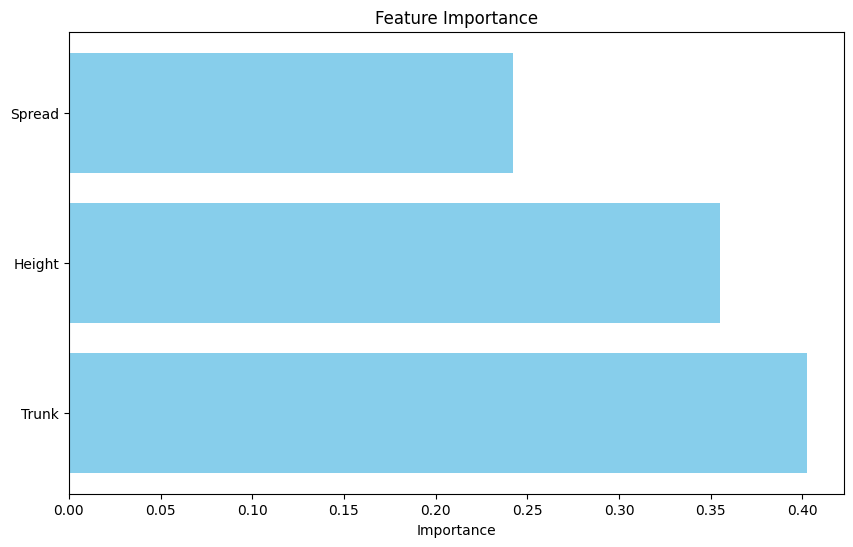

In [ ]:
# Get feature importances
importances = rf_classifier.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

# Zero-Shot Learning for Tree Image Analysis: Classification, Detection, and Segmentation


Zero-shot learning (ZSL) is a machine learning technique where a model is trained to recognize objects, categories, or concepts that it has not seen during training. This is particularly useful in scenarios where it is impractical to have labeled data for every category. ZSL can be applied to various tasks such as classification, detection, and segmentation. Here's how zero-shot learning applies to each:


## Zero-Shot Classification of Trees
In zero-shot classification for tree images, the model uses semantic information about tree species, such as leaf shape, bark texture, or typical habitat, to classify tree species it has not encountered during training. For example, if a model is trained with semantic descriptions of various trees, it could potentially classify an unseen species like "Ginkgo biloba" by associating its unique fan-shaped leaves with learned attributes.

## Zero-Shot Detection in Tree Images
Zero-shot detection extends zero-shot classification to not only identify tree species in an image but also pinpoint their location. This is crucial for ecological surveys where understanding the spatial distribution of various tree species is important. The model would use learned semantic attributes and apply them to detect and outline trees in wilderness images, even if those specific tree species were not part of the training dataset.

## Zero-Shot Segmentation of Tree Images
Zero-shot segmentation involves the detailed identification and outlining of tree parts in images, such as differentiating between the trunk, branches, and foliage, even for tree species that were not in the training set. By leveraging semantic knowledge (e.g., "leaves are generally oval and clustered at the top"), the model can segment parts of a tree in an image, facilitating detailed botanical analysis and aiding in studies like biomass estimation or health assessment.
Applying zero-shot learning to tree image analysis not only enhances the ability to process images from diverse and sometimes undocumented tree species but also supports biodiversity monitoring and conservation efforts by reducing the reliance on extensive labeled datasets.



# Object Detection and Segmentation of a Tree

## Introduction

In this section, I will demonstrate how to perform object detection and segmentation on an image of a tree using Python. We will utilize the `OpenCV` library for image processing and a pre-trained model from `TensorFlow` for object detection.


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 27.9 MB/s eta 0:00:00


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


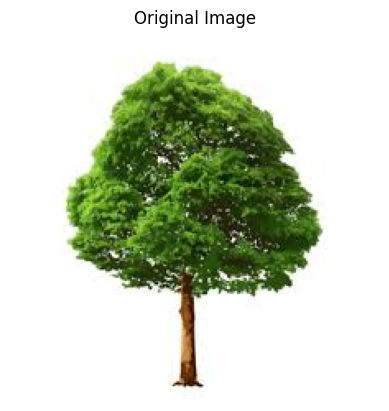

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO, SAM


#Load the image
image_path = '/content/drive/MyDrive/tree1.jpg' # Replace with your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#Display the image
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Original Image')
plt.show()

100%|██████████| 109M/109M [00:01<00:00, 101MB/s]



image 1/1 /content/drive/MyDrive/tree1.jpg: 640x640 1 broccoli, 5292.4ms
Speed: 4.7ms preprocess, 5292.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


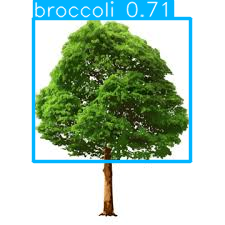

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([50.])
conf: tensor([0.7087])
data: tensor([[ 33.8590,  18.3789, 190.3864, 161.8253,   0.7087,  50.0000]])
id: None
is_track: False
orig_shape: (225, 225)
shape: torch.Size([1, 6])
xywh: tensor([[112.1227,  90.1021, 156.5274, 143.4464]])
xywhn: tensor([[0.4983, 0.4005, 0.6957, 0.6375]])
xyxy: tensor([[ 33.8590,  18.3789, 190.3864, 161.8253]])
xyxyn: tensor([[0.1505, 0.0817, 0.8462, 0.7192]])


In [ ]:
# Load a COCO-pretrained YOLO11 model
model = YOLO("yolo11x.pt")
results = model("/content/drive/MyDrive/tree1.jpg")
results[0].show()

# View results
for r in results:
    print(r.boxes)


image 1/1 /content/drive/MyDrive/tree1.jpg: 640x640 (no detections), 3627.1ms
Speed: 4.9ms preprocess, 3627.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


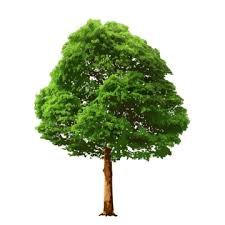

None


In [ ]:
#segmentation
from ultralytics import YOLO
model = YOLO('yolo11m-seg.pt')
results = model("/content/drive/MyDrive/tree1.jpg")
#results = model("/content/tree2.jpg")
results[0].show()


# View results
for r in results:
    print(r.masks)


image 1/1 /content/drive/MyDrive/tree1.jpg: 224x224 pot 0.56, broccoli 0.34, buckeye 0.01, custard_apple 0.01, nail 0.01, 203.8ms
Speed: 5.8ms preprocess, 203.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


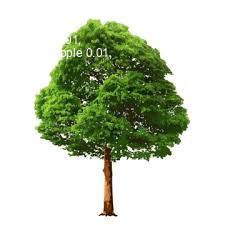

ultralytics.engine.results.Probs object with attributes:

data: tensor([1.2851e-05, 3.3498e-06, 6.7838e-08, 2.6354e-07, 8.3185e-07, 1.6435e-04, 2.6229e-06, 2.4501e-07, 1.1020e-06, 3.3718e-04, 5.1300e-06, 2.6146e-06, 3.3778e-06, 7.3311e-07, 1.2614e-06, 4.7348e-07, 6.7021e-06, 4.8033e-07, 1.2813e-06, 5.7766e-07, 5.8335e-06, 5.9311e-05, 5.2562e-05, 3.6776e-05, 2.2898e-06, 4.6558e-06,
        4.5507e-05, 2.7259e-05, 1.7554e-06, 7.8533e-06, 1.1332e-06, 7.0272e-06, 9.1632e-05, 8.7221e-06, 3.6519e-06, 3.3208e-05, 7.0594e-05, 4.2302e-06, 3.6146e-05, 4.6586e-07, 2.2005e-07, 3.1984e-07, 1.0745e-06, 5.3066e-04, 1.6635e-06, 1.4937e-06, 1.9177e-06, 1.0462e-05, 2.3824e-07, 2.2225e-07, 1.9563e-06, 5.2845e-06,
        2.9267e-05, 2.0002e-06, 1.3779e-06, 5.4123e-07, 8.3506e-08, 1.6267e-06, 1.7193e-06, 1.1267e-05, 1.5815e-06, 4.3254e-07, 2.7301e-06, 4.2172e-05, 2.9570e-05, 9.4823e-06, 4.9388e-06, 2.0962e-06, 1.3613e-06, 5.7491e-06, 3.3294e-05, 3.6326e-06, 8.7051e-06, 2.7705e-04, 1.0923e-06, 4.2725e-06, 

In [ ]:
#image-classification
from ultralytics import YOLO
model = YOLO('yolo11m-cls.pt')
results = model("/content/drive/MyDrive/tree1.jpg")
results[0].show()


# View results
for r in results:
    print(r.probs)

Model summary: 470 layers, 46,043,842 parameters, 46,043,842 gradients

image 1/1 /content/drive/MyDrive/tree1.jpg: 1024x1024 1 0, 1 1, 1 2, 516516.0ms
Speed: 31.7ms preprocess, 516516.0ms inference, 12.6ms postprocess per image at shape (1, 3, 1024, 1024)


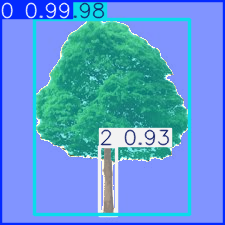

In [ ]:
from ultralytics import SAM

# Load a model
model = SAM("sam2_s.pt")

# Display model information (optional)
model.info()

# Run inference
results = model("/content/drive/MyDrive/tree1.jpg")

results[0].show()


image 1/1 /content/tree2.jpg: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 573294.9ms
Speed: 18.0ms preprocess, 573294.9ms inference, 25.1ms postprocess per image at shape (1, 3, 1024, 1024)


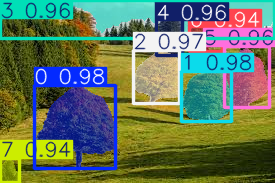

In [ ]:
# Run inference
results1 = model("/content/tree2.jpg")

results1[0].show()

**Resources**

1. [Ultralytics YOLO11](https://docs.ultralytics.com/models/yolo11/)
2. [SAM2: Segement Anything Model 2](https://docs.ultralytics.com/models/sam-2/)